<a href="https://colab.research.google.com/github/DanielOMartins/Estudos/blob/master/Quest%C3%A3o2_A1_Daniel_Martins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
import graphviz
import numpy as np
import os
from sklearn.tree import export_text

from google.colab import drive

In [2]:
drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks")

Mounted at /content/drive


[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [7.  3.2 4.7 1.4 1. ]
 [6.4 3.2 4.5 1.5 1. ]
 [6.9 3.1 4.9 1.5 1. ]
 [6.3 3.3 6.  2.5 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [7.1 3.  5.9 2.1 2. ]]
|--- petal length (cm) <= 2.95
|   |--- class: 0.0
|--- petal length (cm) >  2.95
|   |--- petal length (cm) <= 5.00
|   |   |--- class: 1.0
|   |--- petal length (cm) >  5.00
|   |   |--- class: 2.0



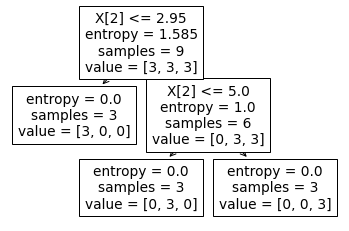

In [3]:
if __name__ == "__main__":

    # reading iris data
    fname = os.path.join("iris.csv")
    dataset = np.loadtxt(fname, delimiter=",")

    print(dataset)
    # separate data and labels
    x_data = dataset[0:, 0:4]
    y_data = dataset[0:, 4:5]

    # building a decision tree
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(x_data, y_data)
    tree.plot_tree(clf)

    # defining features names
    features = ['sepal length (cm)', 'sepal width (cm)',
                'petal length (cm)', 'petal width (cm)']

    # defining labels names
    classes = ['setosa', 'versicolor', 'virginica']

    # writing a tree to text console
    text_tree = export_text(clf, feature_names=features)
    print(text_tree)

    # defining parameters to visualize a tree
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=features,
                                    class_names=classes,
                                    filled=True,
                                    rounded=True,
                                    special_characters=True
                                    )

    # creating a visual graph
    graph = graphviz.Source(dot_data)
    graph.render("iris")